In [278]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
%matplotlib inline

In [279]:
def phi_pol(x, orden):
    pol = []
    for i in orden:
            pol.append(x**int(i))
    return np.array(pol).T


def modelo2(x, pre_mod, params):
    m = pre_mod + params[0]*np.sin(params[1]*x + params[2])*np.exp(params[3]*x)
    return m


def log_like(params, x, y, pre_mod, sigma_e, modelo):
    mod = modelo(x, pre_mod, params)
    arg = - 0.5*(len(y)*np.log(2*np.pi*sigma_e**2) + np.sum((y - mod)**2)/sigma_e**2)
    return arg*-1


def MAP(x, y, orden, basis='pol', reg=0):
    """
    Retorna:
    t: estimador MAP
    """
    d = len(orden)
    if basis=='pol':
        p = phi_pol(x, orden=orden)
    t = np.linalg.inv(p.T@p + reg*np.ones((d, d)))@p.T@y
    return t


def error(y_val, val):
    return np.around(np.sum((y_val - val)**2), 2)

$Y = \Phi(X) \theta + \eta$

$\theta_{\text{MAP}} = (\Phi^{T}(X)\Phi(X))^{-1} \Phi^{T}(X) Y$

$\theta_{\text{MAP}} = (\Phi^{T}(X)\Phi(X) + \rho \mathbb{1})^{-1} \Phi^{T}(X) Y$

$\Phi(X) \in N \text{x} D$

$\rho = \frac{\sigma_{\epsilon}^{2}}{\sigma_{\theta}^{2}}$

Donde $\sigma_{\theta}^{2}$ es la varianza del prior y $\sigma_{\epsilon}^{2}$ es el error de medición. Suponiendo que $\sigma_{\epsilon}^{2} = 1$:

$\rho = \frac{1}{\sigma_{\theta}^{2}}$

Text(0.5,1,'conjunto de datos')

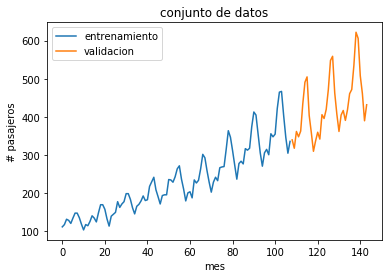

In [280]:
data = np.loadtxt('datosT2.txt')
n_train = int(12*9)
mes_train = data[:n_train, 0]
pax_train = data[:n_train, 1]
mes_val = data[n_train:, 0]
pax_val = data[n_train:, 1]
plt.plot(mes_train, pax_train, label='entrenamiento')
plt.plot(mes_val, pax_val, label='validacion')
plt.legend()
plt.xlabel('mes')
plt.ylabel('# pasajeros')
plt.title('conjunto de datos')

In [281]:
s_e = 1
rho = 1
s_t = 1

theta_map = MAP(mes_train, pax_train, orden=np.arange(1, 5, 1), basis='pol', reg=rho)

In [282]:
p_train = phi_pol(mes_train, orden=np.arange(1, 5, 1))
p_val = phi_pol(mes_val, orden=np.arange(1, 5, 1))
mod1 = p_train@theta_map
val1 = p_val@theta_map

theta_map = [ 1.47722714e+01 -4.29954151e-01  5.46826476e-03 -2.28112509e-05]
error de entrenamiento = 4149889.54


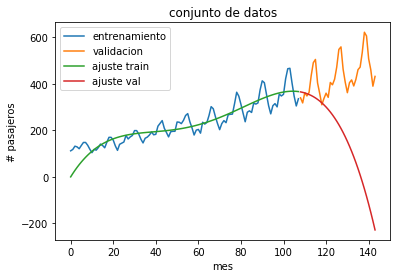

In [283]:
data = np.loadtxt('datosT2.txt')
n_train = int(12*9)
mes_train = data[:n_train, 0]
pax_train = data[:n_train, 1]
mes_val = data[n_train:, 0]
pax_val = data[n_train:, 1]
plt.plot(mes_train, pax_train, label='entrenamiento')
plt.plot(mes_val, pax_val, label='validacion')
plt.plot(mes_train, mod1, label='ajuste train')
plt.plot(mes_val, val1, label='ajuste val')
plt.legend()
plt.xlabel('mes')
plt.ylabel('# pasajeros')
plt.title('conjunto de datos')

print('theta_map =', theta_map)
print('error de entrenamiento =', error(pax_val, val1))

x0 = [4.34961039 0.62831853 1.22531426 0.01      ]
xf = [14.15405399  0.51467677 11.87431651  0.01531581]
error de entrenamiento = 3864765.06


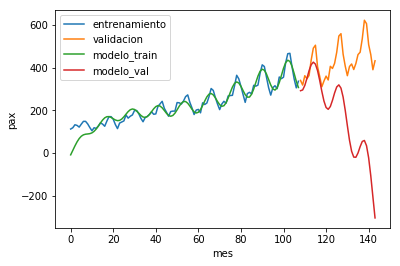

In [292]:
plt.plot(mes_train, pax_train, label='entrenamiento')
plt.plot(mes_val, pax_val, label='validacion')
plt.xlabel('mes')
plt.ylabel('pax')

t1 = np.random.uniform(1, 10)
t2 = 2*np.pi/10
t3 = np.random.uniform(0, 2*np.pi)
x0 = np.array([t1, t2, t3, 0.01])
tol = 1e-1

res2 = minimize(fun=log_like, x0=x0, args=(mes_train, pax_train, mod1, s_e, modelo2), method='BFGS', tol=tol)
mod2 = modelo2(x=mes_train, pre_mod=mod1, params=res2.x)
val2 = modelo2(x=mes_val, pre_mod=val1, params=res2.x)
plt.plot(mes_train, mod2, label='modelo_train')
plt.plot(mes_val, val2, label='modelo_val')
plt.legend()

print('x0 =', x0)
print('xf =', res2.x)
print('error de entrenamiento =', error(pax_val, val2))
print('converge', res2.success)

x0 = [1.36131849 1.25663706 4.97533795 0.01      ]
xf = [1.51735198e+01 1.05295149e+00 2.56110543e+01 5.91977764e-03]
error de entrenamiento = 3870813.47


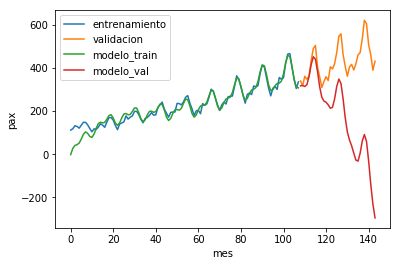

In [303]:
plt.plot(mes_train, pax_train, label='entrenamiento')
plt.plot(mes_val, pax_val, label='validacion')
plt.xlabel('mes')
plt.ylabel('pax')

t1 = np.random.uniform(1, 10)
t2 = 2*np.pi/5
t3 = np.random.uniform(0, 2*np.pi)
x0 = np.array([t1, t2, t3, 0.01])

res3 = minimize(fun=log_like, x0=x0, args=(mes_train, pax_train, mod2, s_e, modelo2), method='BFGS', tol=tol)
mod3 = modelo2(x=mes_train, pre_mod=mod2, params=res3.x)
val3 = modelo2(x=mes_val, pre_mod=val2, params=res3.x)
plt.plot(mes_train, mod3, label='modelo_train')
plt.plot(mes_val, val3, label='modelo_val')
plt.legend()

print('x0 =', x0)
print('xf =', res3.x)
print('error de entrenamiento =', error(pax_val, val3))
print('converge', res3.success)